### This Jupyter notebook will be used to determine the user defines variables

#### Step 1 - Retrieve Location of Desired Study Area
Using either a shapefile, coordinate, or WKT the study area for where satalite imagery will be downloaded is to be determined

In [22]:
import download
from download import *

### Find data using a geographic search
To begin, we will need to craft a suitable WKT. ASF's [Vertex](https://search.asf.alaska.edu) can be helpful in this regard, as it allows you to draw on a map, or import a geospatial file such as a shapefile or geojson, after which a WKT string can be copied and used elsewhere. <br><br>
This method is good for bulk downloads of all scenes matching the description, excercise with caution as it will download the max limit (currently set at 10) and can take awhile.

In [2]:
#Select location using a WKT obtained from ASF's Vertex search site or copied from a geodatabase
#example: POLYGON((-61.0632 -20.9625,-59.9217 -20.9625,-59.9217 -20.425,-61.0632 -20.425,-61.0632 -20.9625))
wktlocation = download.location()

The given location is: POLYGON((-61.0632 -20.9625,-59.9217 -20.9625,-59.9217 -20.425,-61.0632 -20.425,-61.0632 -20.9625))


In [3]:
#set start date for search
dateStart = download.startDate()

Start Date: 2020-01-01
Does start date match format? : True


In [4]:
#set end date for search
dateEnd = download.endDate()

End Date: 2020-01-10
Does end date match format? : True


### Finding data using an existing scene name
If you already have the name of the scene (i.e. 'S1A_EW_GRDM_1SDH_20150205T122016_20150205T122116_004488_005812_F6B0') you can use this part of the program. This is the recommended method as it allows the user to visually verify the scene before downloading.

In [23]:
#create blank list OR run to reset current list
scene_list = []
print(scene_list)

[]


In [24]:
#add scenes to the list to search using ASF's Vertex online app, run as many times as needed to append the list
#to follow the example please input 'S1B_IW_GRDH_1SDV_20200607T223317_20200607T223346_021933_0299FF_1064'
scene_list.append(input('input the scene here (i.e. \'S1B_IW_GRDH_1SDV_20200607T223317_20200607T223346_021933_0299FF_1064'))
print(scene_list)

['S1B_IW_GRDH_1SDV_20200607T223317_20200607T223346_021933_0299FF_1064']


#### Choosing type of download

In [25]:
#choose type of product search
resultChoice=input('Type either: centroid, geo, or scene depending on the search criteria used')

if resultChoice == 'centroid':
    results = download.centroid_loc(wktlocation, dateStart, dateEnd)
elif resultChoice == 'geo':
    results = download.geo_loc(wktlocation, dateStart, dateEnd)
elif resultChoice == 'scene':
    results = download.scene_loc(scene_list)
else:
    print('Error, please try again')

2 results found


#### Login to downlaod data

You to have an [Earthdata Login](https://urs.earthdata.nasa.gov/) account to access the download function. The easiest way to check that your EDL account is in order is to simply go to [Vertex](https://search.asf.alaska.edu) and try to download a product.

In [26]:
#login to ASF Search with Earthdata account
user_session = download.ASF_login()

Success!


#### Download the data
The scene search will download the specific file the user found in [Vertex](https://search.asf.alaska.edu), this may be prefered to geographic search.<br><br>
The geographic search methods are good for bulk downloads of all scenes matching the description, excercise with caution as it will download the max limit (currently set at 10) and can take awhile.

In [ ]:
import os.path
from os import mkdir

In [27]:
#set the downlaod directory, or create it if it doesnt exist
download.dir_create()

Downlaods can take awhile, with files capable of being mulitple GB each, please be patient

In [29]:
download.download_products(results, user_session)

c:\Users\Kyle\OneDrive\OneDriveDocuments\Coding\ice-cover-change\venv-ice\lib\site-packages\asf_search\download\download.py:61: UserWarning: File already exists, skipping download: ./downloads\S1B_IW_GRDH_1SDV_20200607T223317_20200607T223346_021933_0299FF_1064.zip
  warnings.warn(f'File already exists, skipping download: {os.path.join(path, filename)}')
c:\Users\Kyle\OneDrive\OneDriveDocuments\Coding\ice-cover-change\venv-ice\lib\site-packages\asf_search\download\download.py:61: UserWarning: File already exists, skipping download: ./downloads\S1B_IW_GRDH_1SDV_20200607T223317_20200607T223346_021933_0299FF_1064.iso.xml
  warnings.warn(f'File already exists, skipping download: {os.path.join(path, filename)}')


### Data Manipulation
I have provided geotiffs in the data folder already to save the trouble of downloading and georeferencing. If self downloaded use following cell to ensure georeferencing is done to the same projection as shapefile

#### Unzip

In [1]:
import manipulation
from manipulation import *

In [31]:
#unzip downloaded products
manipulation.unzip()

Done S1B_IW_GRDH_1SDV_20200607T223317_20200607T223346_021933_0299FF_1064
Done S1B_IW_GRDH_1SDV_20210614T223323_20210614T223352_027358_03447D_B0C9


### Raster Manipulation

In [2]:
#Run this command for every raster file you want to clip!
manipulation.clip()

In [2]:
#reclassify the image
manipulation.reclass()

### Maps

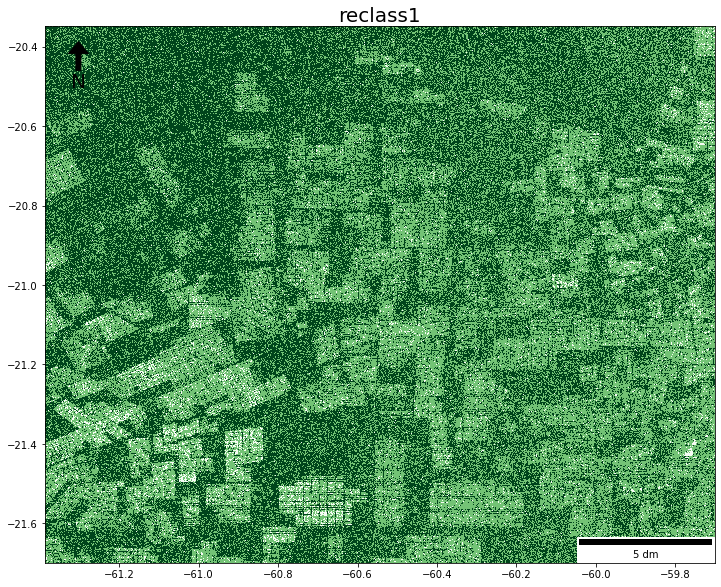

In [3]:
#It is recommended to use reclassified tif's for easier viewing.
manipulation.present_maps()

### And now the files are ready for maipulation and analysis :D